In [1]:
import numpy as np
import tensorflow as tf
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import vgg16
import utils

In [2]:
def choose_batch(imdb, current_ind, batch_size):
    i = 0
    for img in imdb[current_ind:current_ind+batch_size]:
        if i == 0:
            batch = (utils.load_image(img)).reshape((1, 224, 224, 3))
            i += 1
        else:
            temp_batch = (utils.load_image(img)).reshape((1, 224, 224, 3))
            batch = np.concatenate((batch, temp_batch),0)
            i += 1
    return batch

In [3]:
# read data from the test dataset
imdb_path = './test'
batch_size = 1
imdb = []
num_files = len(os.listdir(imdb_path))
for ind,img in enumerate(os.listdir(imdb_path)):
    imdb.append(imdb_path+'/'+img)

In [4]:
# create 13-len list of shape [num_images,1000,num_channels in that layer]
arr_hm = np.empty([1000,512], dtype=float)
# arr_hm = [np.empty([num_files,1000,64], dtype=float),
#             np.empty([num_files,1000,64], dtype=float),
#             np.empty([num_files,1000,128], dtype=float),
#             np.empty([num_files,1000,128], dtype=float),
#             np.empty([num_files,1000,256], dtype=float),
#             np.empty([num_files,1000,256], dtype=float),
#             np.empty([num_files,1000,256], dtype=float),
#             np.empty([num_files,1000,512], dtype=float),
#             np.empty([num_files,1000,512], dtype=float),
#             np.empty([num_files,1000,512], dtype=float),
#             np.empty([num_files,1000,512], dtype=float),
#             np.empty([num_files,1000,512], dtype=float),
#             np.empty([num_files,1000,512], dtype=float)]

In [5]:
tfconfig = tf.ConfigProto(allow_soft_placement=True)
tfconfig.gpu_options.allow_growth=True
with tf.Session(config=tfconfig) as sess:
# with tf.device('/cpu:0'):
    with tf.Session() as sess:
        images = tf.placeholder("float", [1, 224, 224, 3])
        current_ind = 0
        batch = choose_batch(imdb,current_ind,batch_size)
        feed_dict = {images: batch}
        vgg = vgg16.Vgg16()
        with tf.name_scope("content_vgg"):
            vgg.build(images)
        prob = sess.run(vgg.prob, feed_dict=feed_dict)
#         if current_ind < len(os.listdir(imdb_path)):
#         if current_ind < 2:
#             images = tf.placeholder("float", [2, 224, 224, 3])
#             print 'appending images for one batch'
#             batch = choose_batch(imdb,current_ind,batch_size)
#             feed_dict = {images: batch}

#             vgg = vgg16.Vgg16()
#             with tf.name_scope("content_vgg"):
#                 vgg.build(images)
            
#             prob = sess.run(vgg.prob, feed_dict=feed_dict)
#             print prob.shape

#             for j in range(13):
#                 print 'collecting activations for {}th layer'.format(j)
#                 test = sess.run(vgg.collection[j],feed_dict=batch)
#                 print test.shape
                # arr_hm[j][current_ind:current_ind+batch_size] = \
                # sess.run(vgg.collection[j],feed_dict=batch)

#             current_ind += batch_size
        # arr_hm is collected
        
        # do sth with arr_hm here

/volume/home/shuang/tensorflow-vgg/vgg16.npy
npy file loaded
build model started
build model finished: 0s


In [5]:
clas = np.zeros([1000,1])
tfconfig = tf.ConfigProto(allow_soft_placement=True)
tfconfig.gpu_options.allow_growth=True
with tf.Session(config=tfconfig) as sess:
    with tf.Session() as sess:
        images = tf.placeholder("float", [1, 224, 224, 3])
        vgg = vgg16.Vgg16()
        with tf.name_scope("content_vgg"):
            vgg.build(images)
        for img in os.listdir(imdb_path):
            batch = (utils.load_image('{}/{}'.format(imdb_path,img))).reshape((1, 224, 224, 3))
            feed_dict = {images:batch}
            act_13,prob = sess.run([vgg.collection[-1],vgg.prob],feed_dict=feed_dict)
            print np.argmax(prob)
            clas[np.argmax(prob)] += 1
            arr_hm[np.argmax(prob)] += np.sum(act_13,axis=(0,1,2))

/volume/home/shuang/tensorflow-vgg/vgg16.npy
npy file loaded
build model started
build model finished: 0s
640
76
331
4
576
389
172
605
640
654
988
805
709
833
69
879
409
356
688
321
495
79
152
778
837
868
766
268
319
71
419
721
831
900
744
377
898
585
420
828
457
315
981
267
426
488
499
593
871
332
767
395
470
871
952
206
517
527
898
346
970
826
726
734
138
427
924
55
331
444
104
143
438
261
685
584
607
384
283
232
734
966
625
204
490
706
174
477
819
705
659
290
975
99
49
905
562
639
847
181
257
392
657
776
463
256
466
45
78
679
94
572
863
269
300
612
405
820
888
272
582
101
142
437
308
705
361
91
494
230
812
174
393
908
798
240
12
381
306
502
208
835
670
381
463
743
69
843
108
155
916
664
757
170
243
392
848
549
563
272
838
324
580
110
256
857
787
266
877
5
148
637
495
707
844
913
431
36
6
953
559
470
89
904
109
265
227
681
9
717
758
610
6
224
533
571
101
790
99
983
993
412
305
567
885
16
363
711
174
698
176
851
536
718
435
747
489
633
383
521
675
397
430
873
316
865
612
737
679
532
2

87
833
691
196
312
705
957
75
288
669
214
295
701
573
225
916
971
560
64
544
307
973
427
882
151
364
777
825
640
840
246
535
382
17
631
763
127
702
756
783
668
166
26
757
444
713
743
158
795
157
78
677
729
544
357
39
753
57
636
504
526
814
948
462
254
747
894
520
488
307
69
440
947
694
6
111
438
912
671
635
946
378
764
775
747
412
772
280
752
289
666
776
178
398
638
450
666
122
734
473
720
936
429
355
857
176
685
399
773
3
393
533
150
939
118
811
575
655
82
272
293
429
524
873
702
240
573
223
671
304
357
817
398
293
31
764
527
532
259
107
183
308
404
569
452
757
100
909
867
372
425
482
377
499
898
165
654
210
49
874
871
188
224
14
170
527
92
383
695
84
421
643
680
625
738
662
520
789
800
894
204
238
319
649
720
221
728
542
802
360
346
844
262
771
875
396
99
18
520
584
153
212
198
284
507
707
358
658
482
86
955
826
686
153
47
310
460
195
886
844
672
117
393
936
171
410
765
743
123
866
863
12
423
250
734
178
331
893
172
434
54
496
565
50
221
311
82
606
936
456
305
99
603
192
800
170
605


892
723
521
195
255
842
279
865
737
654
573
6
307
712
233
52
511
107
971
615
275
725
210
195
577
388
658
873
539
730
447
171
730
644
976
919
436
383
966
635
485
97
690
447
890
968
177
572
6
150
270
546
854
42
56
743
810
575
669
974
710
191
914
470
259
229
746
268
399
143
989
845
524
123
30
928
576
800
512
321
649
883
581
449
970
692
310
631
229
745
692
212
169
385
621
212
868
892
907
448
298
252
913
767
821
784
519
908
791
141
642
423
701
187
773
835
443
128
606
475
607
650
477
495
194
145
69
66
294
401
609
789
712
729
286
898
902
139
690
450
916
856
162
631
609
749
795
484
986
864
626
795
594
684
520
856
590
668
730
36
172
630
605
410
222
616
727
230
229
106
188
275
739
893
778
347
835
65
814
431
973
61
65
819
651
295
585
59
276
406
525
669
801
799
594
228
258
370
71
88
257
742
947
667
616
132
120
90
267
738
784
199
172
411
256
73
521
458
353
991
348
149
357
562
459
29
606
360
137
295
679
748
329
609
832
862
357
14
33
295
366
659
759
503
251
728
508
349
783
350
162
352
365
246
696
585

723
426
305
436
143
523
281
402
205
124
723
728
702
324
310
617
527
394
731
511
550
140
56
980
822
353
730
387
772
881
592
413
308
985
431
434
536
318
492
728
386
794
996
548
195
171
324
289
485
854
731
485
6
108
978
716
529
648
39
137
799
937
517
877
327
421
146
138
717
18
178
65
511
374
645
772
317
544
870
134
665
409
310
726
176
277
616
480
671
586
799
662
752
971
520
868
22
448
139
822
212
104
311
151
818
115
503
124
65
431
758
485
852
626
246
575
774
547
751
968
154
383
110
448
410
883
972
553
267
220
658
529
827
397
868
388
570
619
463
373
436
212
727
844
233
706
174
483
658
157
539
443
614
664
200
258
921
850
707
84
458
785
129
131
95
228
896
270
360
335
171
802
695
310
252
81
126
783
970
14
252
193
34
989
14
805
870
152
574
177
150
726
74
560
161
603
971
785
406
369
350
921
765
139
13
33
564
946
813
409
104
119
798
434
734
755
18
394
388
579
428
840
179
983
66
973
238
47
656
280
267
556
315
948
880
617
393
431
882
819
665
107
419
201
446
705
903
641
845
310
732
714
525
520
179


864
739
388
406
698
424
357
544
978
560
88
561
209
767
51
246
805
603
676
873
255
65
648
380
543
475
713
654
73
728
782
642
987
148
441
238
406
373
636
104
938
308
785
768
877
913
711
572
290
666
659
125
515
541
251
85
956
174
192
453
85
510
747
627
97
913
604
21
815
978
576
268
893
171
709
509
267
133
529
757
773
108
350
609
893
846
811
752
583
128
388
951
113
825
294
621
126
653
894
743
323
586
254
59
95
994
971
973
76
679
348
340
214
877
837
269
342
201
164
592
788
353
728
346
91
79
394
575
170
626
71
763
88
194
748
460
496
579
750
501
220
50
328
722
378
511
177
205
703
770
538
538
427
295
947
183
915
180
414
473
649
423
514
123
85
734
664
370
2
532
948
433
275
280
827
545
468
872
471
658
294
570
444
461
527
203
433
237
967
495
466
272
353
38
726
119
507
644
57
483
333
170
742
743
465
44
629
767
269
561
292
406
679
588
288
307
406
377
412
380
370
342
847
311
973
269
434
306
133
921
192
898
414
347
657
138
105
818
303
829
160
606
120
761
742
258
679
562
94
818
633
157
583
197
994
151

114
140
547
269
134
1
101
349
257
615
608
670
477
845
171
565
706
904
606
421
181
324
569
874
832
107
584
501
203
706
487
183
249
152
147
916
249
978
372
823
713
986
112
283
395
484
21
717
851
160
678
23
501
483
52
318
92
272
108
892
20
321
172
473
334
400
732
900
155
898
921
481
605
321
88
488
655
402
801
287
7
780
708
350
78
470
349
515
45
840
289
882
544
311
854
716
100
152
788
794
788
255
194
507
83
546
969
487
728
496
172
27
212
144
692
665
668
324
762
572
379
203
772
853
831
562
676
738
790
743
489
756
764
395
427
536
21
344
913
609
65
433
394
449
900
315
473
629
728
809
627
818
123
257
236
274
528
203
264
17
345
728
919
687
886
912
822
506
980
417
464
192
978
755
150
578
44
905
216
972
718
619
673
580
886
310
318
815
324
249
572
279
866
607
133
438
297
98
227
383
349
431
845
248
614
727
818
531
47
527
189
497
366
961
87
716
704
549
710
840
406
970
761
977
801
780
968
922
632
320
640
824
687
937
386
547
738
249
370
861
330
435
792
256
324
759
99
47
792
413
676
946
460
749
153
682

802
630
438
734
854
494
662
56
579
730
554
798
550
612
47
137
526
318
134
217
636
653
46
853
646
844
423
944
870
528
566
587
773
749
672
796
474


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [6]:
print img

ILSVRC2012_test_00036696.JPEG


In [7]:
for i in range(1000):
    if clas[i] != 0:
        arr_hm[i] = arr_hm[i]/clas[i]

In [8]:
print arr_hm.shape

(1000, 512)


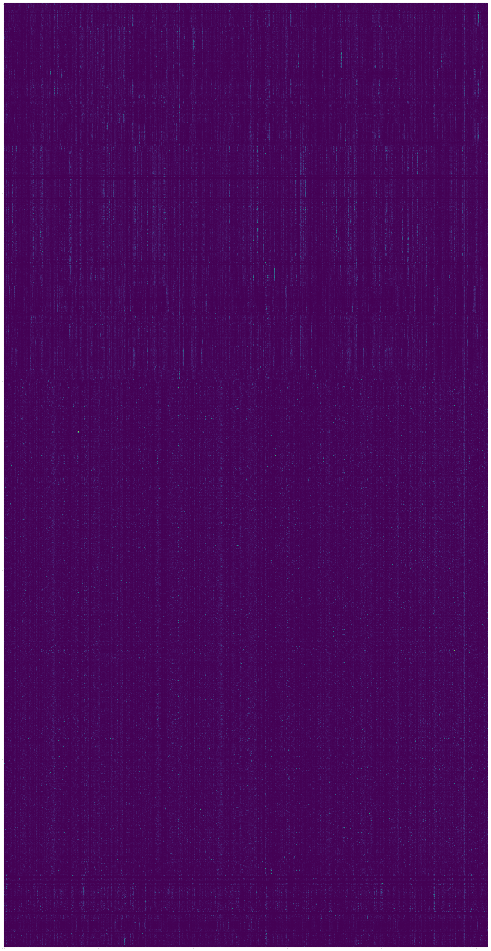

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (128,250),dpi=5,facecolor='w',edgecolor='k')
ax = plt.axes()
plt.imshow(arr_hm)
# fig = plt.figure(figsize = (512,500),dpi=2,facecolor='w',edgecolor='k')
# ax = plt.axes()
# plt.subplot()
# heatmap = ax.pcolormesh(arr_hm,cmap=plt.cm.Blues,alpha=0.8)

In [40]:
print np.where(clas!=0)[0].shape

(984,)


In [41]:
arr_hm[np.where(clas!=0)[0],:].shape

(984, 512)

In [42]:
corr = np.corrcoef(arr_hm[np.where(clas!=0)[0],:])

In [43]:
print corr.shape

(984, 984)


In [46]:
print np.average(corr[corr<1])

0.100981594104
